In [55]:
import numpy as np
import pandas as pd

all_train_data = pd.read_csv('train.txt', nrows = 2e6, sep='\t', header=None)

In [58]:
all_train_data.head(10)
all_train_data.iloc[1:15,14:]
print(all_train_data.shape)
# first column is binary
# columns 1 to 13 is integer
# columns 14 to 39 is categorical

(2000000, 40)


# 2.1 PARTITIONING THE DATA

In [584]:
import random

# Get Indexes:
all_ind = random.sample(range(0,int(2e6)),int(2e6))
len(all_ind)
max(all_ind)
min(all_ind)

# Partition the Data
# vector indexing INCLUDES the first number but DOES NOT INCLUDE the last number.
# hence all_ind[0:4] will show the 0th, 1st, 2nd and 3rd rows but NOT the 4th.
# train1M
train_ind = all_ind[0:int(1e6)]
train1M = all_train_data.iloc[train_ind,:]

# validation250k
valid_ind = all_ind[int(1e6):int(1e6+250e3)]
validation250k = all_train_data.iloc[valid_ind,:]

# test750k
test_ind = all_ind[int(1e6+250e3):int(1e6+250e3+750e3)]
test750k = all_train_data.iloc[test_ind,:]

In [585]:
isit = np.arange(0,int(1e6))
isit2 = np.arange(int(1e6+250e3),int(1e6+250e3+750e3))
print(isit2[1:15])
print(isit2[-3:])

[1250001 1250002 1250003 1250004 1250005 1250006 1250007 1250008 1250009
 1250010 1250011 1250012 1250013 1250014]
[1999997 1999998 1999999]


# 2.2 SUMMARY STATISTICS

## Clean the Data

In [586]:
# Integer data:
int_data = train1M.values[:,1:14]
int_data[:,1].shape

(1000000,)

In [587]:
# Clean -1's:
min1_ind = (int_data == -1)
min1_ind.sum(axis=0)

array([     0, 116306,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0])

In [588]:
int_data[min1_ind] = 0
min1_ind2 = (int_data == -1)
min1_ind2.sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [589]:
# Clean nans:
nan_ind = np.isnan(int_data.tolist())
nan_ind.sum(axis=0)

array([424550,      0, 226952, 236031,  22684, 219037,  39968,    610,
        39968, 424550,  39968, 770820, 236031])

In [590]:
int_data[nan_ind] = 0
nan_ind2 = np.isnan(int_data.tolist())
nan_ind2.sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Categorical Data

In [591]:
izz = train1M[14].unique()
izz[0:15]
len(izz)

1260

In [583]:
%matplotlib inline
import matplotlib as plt

isit = train1M[14].value_counts()[4:30]
isit_log = np.empty(shape)
for i in range(0,len(isit)):
    isit_log[i] = math.log(isit[i])


#newList = list(set(train1M[14]))



isit.plot(kind='barh')

TypeError: 'float' object does not support item assignment

In [582]:
dict_1 = 

6.97354301952014

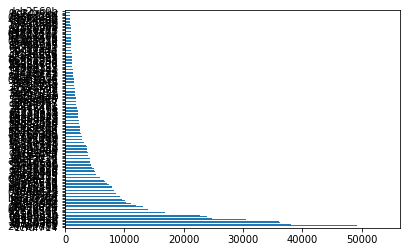

In [594]:
%matplotlib inline
import matplotlib

isit = train1M[15].value_counts()[1:150]
isit.plot(kind= 'barh')

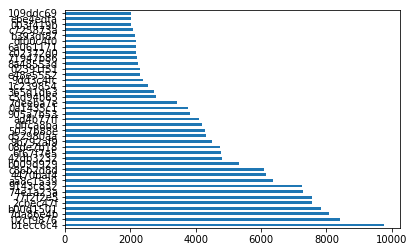

In [281]:
%matplotlib inline
import matplotlib

isit = train1M[16].value_counts()[1:40]
isit.plot(kind= 'barh')

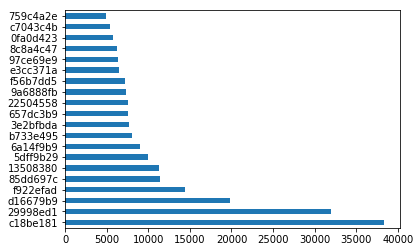

In [268]:
%matplotlib inline
import matplotlib

isit = train1M[17].value_counts()[:20]
isit.plot(kind= 'barh')

(array([  3.53749000e+05,   8.93110000e+04,   4.30480000e+04,
          2.44210000e+04,   1.51910000e+04,   1.04360000e+04,
          7.58000000e+03,   5.68200000e+03,   4.11300000e+03,
          3.23000000e+03,   2.64900000e+03,   2.05000000e+03,
          1.74700000e+03,   1.46300000e+03,   1.16000000e+03,
          1.03200000e+03,   8.51000000e+02,   7.04000000e+02,
          6.09000000e+02,   5.00000000e+02,   4.53000000e+02,
          3.84000000e+02,   3.64000000e+02,   3.32000000e+02,
          2.98000000e+02,   2.37000000e+02,   2.53000000e+02,
          2.15000000e+02,   1.86000000e+02,   1.56000000e+02,
          1.36000000e+02,   1.37000000e+02,   1.24000000e+02,
          1.11000000e+02,   8.00000000e+01,   1.04000000e+02,
          9.30000000e+01,   8.40000000e+01,   7.10000000e+01,
          6.60000000e+01,   7.90000000e+01,   6.10000000e+01,
          6.20000000e+01,   4.50000000e+01,   4.60000000e+01,
          3.40000000e+01,   5.10000000e+01,   2.80000000e+01,
        

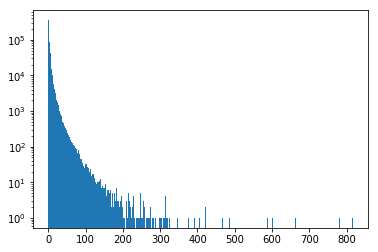

In [331]:
dataaa = train1M[1]
newH1 = train1M[1][~np.isnan(dataaa)]
plt.hist(newH1, normed=False, bins=np.arange(min(newH1), max(newH1) + 2, 2), log=True) #  bins=200,

In [319]:
n

(1000000,)

In [ ]:
from sklearn import preprocessing